In [88]:
import csv

f = open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)
# print(header)
# from sklearn.neighbors  import KNeighborsClassifier 

# 도미
bream_weight = []
bream_length = []

# 빙어
smelt_weight = []
smelt_length = []

for row in data:
    if row[0] == 'Bream':
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
    if row[0] == 'Smelt':
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
    
f.close()
# print(bream_weight)

fish_weight = bream_weight + smelt_weight
fish_length = bream_length + smelt_length

# 데이터들을 사이킷런의 라이브러리에 넣어주기 위해서는 2차원 데이터 형태로 만들어줘야 한다.
print('fish_weight =', fish_weight)
print('fish_length =', fish_length)

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [89]:
import numpy as np

# fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]  # 리스트 컴프리헨션으로 구현
fish_data = np.column_stack((fish_length, fish_weight))  # 튜플 형태로 값을 넘겨주고 있습니다.  # 넘파이 라이브러리로 좀더 쉽게 구현
# numpy.column_stack((배열1,배열2)) # 배열1의 n번째 값과 배열2의 n번째 값이 쌍을이룬 2차원배열을 return   (열방향으로 합침)

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [90]:
# fish_target = [1] * 35 + [0] *14
print(np.ones(35))  # 1을 반복하는 배열을 리턴하는 함수
print(np.zeros(14))  # 

fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # np.concatenate()   행방향(대충가로)으로 합침
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [91]:
# 전달되는 리스트나 배열을 비율에 맞게 학습 데이터셋을 나누어 주는 함수
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state= 42)  
# train_input, test_input= train_test_split(fish_data, random_state= 42)  
# train_target, test_target = train_test_split(fish_target, random_state= 42) 

print(train_input)
print(test_target)


# fish_data가 train_input, test_input으로 쪼개지고 fish_target이 train_target,test_target으로 쪼개진다.

[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [92]:
print(train_input.shape, test_input.shape)  # shape, 모양, 형태(2차원이상 일때 숫자 1차원은 빈킨 ) 

(36, 2) (13, 2)


In [93]:
print(train_target)
print(train_target.shape, test_target.shape)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
(36,) (13,)


In [94]:
print(test_target)  # 10:3   --> 3.3:1

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [95]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state= 42, stratify= fish_target)  

In [96]:
print(test_target)  # 9:4  ---> 2.25:1  -->(원본 비율)35:14  = 5:2   -> 2.5:1


[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [97]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  

1.0

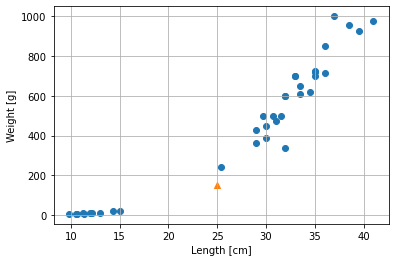

In [98]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [99]:
kn.predict([[25, 150]])   # kn.predict(2차원 배열만 받음 )
# 1: 도미, 0: 빙어

array([0.])

In [100]:
distances, indexes = kn.kneighbors([[25, 150]])  # 가장 가까운 5개의 인덱스값 보기
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


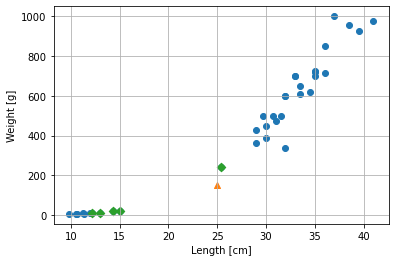

In [101]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = 'D')  #배열 인덱싱 DIamond

plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [102]:
print(train_input[indexes, :])  

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [103]:
print(train_target[indexes])  # 빙어4 도미 1   다수결로 빙어가 당선

[[1. 0. 0. 0. 0.]]


In [104]:
print(distances)    

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


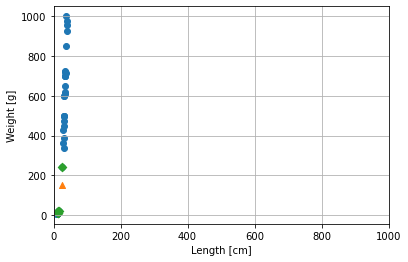

In [105]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = 'D')  #배열 인덱싱 DIamond
plt.xlim([0, 1000])   # x limits
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [106]:
print(train_input[:5])
print(train_input.shape)

[[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 11.3   8.7]
 [ 39.5 925. ]]
(36, 2)


In [107]:
mean = np.mean(train_input, axis = 0)   # axis = 0 이면 아래쪽으로 평균을 계산한다.
std = np.std(train_input, axis = 0)   # standard deviation(편차)  --> std  표준편차

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [108]:
A = np.mean(train_input , axis = 1)
print(A)
print(A.shape)

[264.85  12.2  366.5   10.   482.25 229.5  375.   443.   253.   377.5
 518.5   10.5  327.25  10.9  196.   366.5  265.35 496.75 341.75  17.
 265.75 133.7    8.25 316.     9.   321.75   8.8  367.5  316.   380.
  12.6  240.   186.    17.45 210.   508.  ]
(36,)


In [109]:
train_scaled = (train_input - mean) / std # Z-score  표준점수     #  브로드캐스팅을 이용하여 간단히 배열각각에 계산 가능

print(train_scaled[:5])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


In [110]:
# 유니 캐스팅    1  ----> 1
# 브로드 캐스팅  1  ----> N(모든사람)
# 멀티 캐스팅    1  ----> S(특정사람에게만)

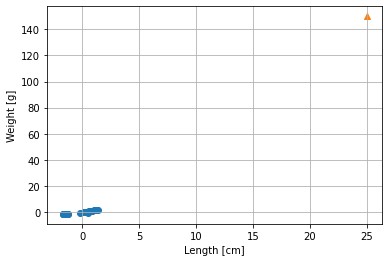

In [111]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')  # 이 데이터는 Z-score 즉 표준점수로 만들지 않았음
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

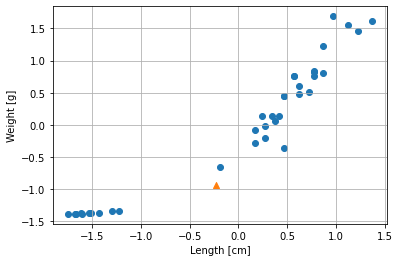

In [112]:
new   = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')  
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [113]:
kn.fit(train_scaled, train_target)       # 모델을 학습 데이터셋에 피팅 (fitting) 시킨다.
test_scaled = (test_input -mean)  /  std
# print(test_scaled.shape)
print('target', test_target)
kn.score(test_scaled, test_target)    # 정확도 계산

target [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [114]:
kn.predict([new])  #  표준점수 고려해주니까 이번에는 1로 변함
# 1: 도미 ,  0: 빙어

array([1.])

In [118]:
distances, indexes  = kn.kneighbors([new])


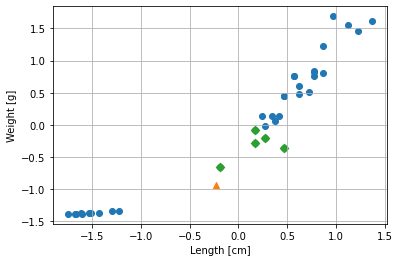

In [119]:
# 도미들이 가까운걸로 측정됨
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')  
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')  # MARKER= diamond
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()